In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras import optimizers
from keras.layers import Dropout
from keras.regularizers import l2

2023-07-24 05:59:09.220896: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-24 05:59:11.436188: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [7]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print(physical_devices)
if physical_devices:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
df = pd.read_csv("../final_df/final_df_minute-15_period-8_feature-27-USDCAD.csv")
df = df.drop("Unnamed: 0", axis=1)

In [3]:
df

,open,open_change,open_pct_change,high,high_change,high_pct_change,low,low_change,low_pct_change,close,...,vwap,vwap_signal,stochrsi,stochrsi_k,stochrsi_d,stochrsi_signal,macd,macd_s,macd_signal,trend
0,1.27268,-0.00024,-0.018854,1.27338,0.00016,0.012567,1.27234,-0.00031,-0.024359,1.27315,...,1.272917,1,0.000000,0.000000,0.000000,0,0.000037,0.000007,1,0
1,1.27312,0.00044,0.034573,1.27325,-0.00013,-0.010209,1.27206,-0.00028,-0.022007,1.27249,...,1.272804,-1,0.000000,0.000000,0.000000,0,0.000012,0.000008,1,0
2,1.27251,-0.00061,-0.047914,1.27268,-0.00057,-0.044767,1.27088,-0.00118,-0.092763,1.27088,...,1.272314,-1,0.000000,0.000000,0.000000,0,-0.000135,-0.000020,-1,0
3,1.27094,-0.00157,-0.123378,1.27154,-0.00114,-0.089575,1.27089,0.00001,0.000787,1.27149,...,1.271795,-1,0.000000,0.000000,0.000000,0,-0.000201,-0.000056,-1,0
4,1.27149,0.00055,0.043275,1.27219,0.00065,0.051119,1.27146,0.00057,0.044850,1.27194,...,1.271519,1,0.357564,0.000000,0.000000,0,-0.000214,-0.000088,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199994,1.32237,0.00045,0.034041,1.32262,0.00023,0.017393,1.32224,0.00032,0.024207,1.32234,...,1.322135,1,0.959955,0.986652,0.893214,0,0.001726,0.001876,-1,1
199995,1.32236,-0.00001,-0.000756,1.32266,0.00004,0.003024,1.32218,-0.00006,-0.004538,1.32219,...,1.322333,-1,0.617480,0.859145,0.929603,-1,0.001675,0.001836,-1,0
199996,1.32222,-0.00014,-0.010587,1.32229,-0.00037,-0.027974,1.32206,-0.00012,-0.009076,1.32219,...,1.322333,-1,0.453465,0.676967,0.840921,0,0.001616,0.001792,-1,0
199997,1.32218,-0.00004,-0.003025,1.32248,0.00019,0.014369,1.32201,-0.00005,-0.003782,1.32217,...,1.322252,-1,0.000000,0.356982,0.631031,0,0.001550,0.001744,-1,0


In [4]:
# number of rows to use 
df = df[-50000:]
df.reset_index(inplace=True)
df = df.drop(['index'], axis=1)

In [5]:
scaler = MinMaxScaler()

In [6]:
df[['open', 'open_change', 'open_pct_change', 'high', 'high_change', 'high_pct_change', 'low', 'low_change', 'low_pct_change',
                        'close', 'close_change', 'close_pct_change', 'volume', 'volume_change', 'volume_pct_change', 
                        'ema_100', 'ema_200', 'vwap', 'stochrsi', 'stochrsi_k', 'stochrsi_d',
                        'macd',	'macd_s'
    ]] = scaler.fit_transform(df[['open', 'open_change', 'open_pct_change', 'high', 'high_change', 'high_pct_change', 'low', 'low_change', 'low_pct_change',
                        'close', 'close_change', 'close_pct_change', 'volume', 'volume_change', 'volume_pct_change', 
                        'ema_100', 'ema_200', 'vwap', 'stochrsi', 'stochrsi_k', 'stochrsi_d',
                        'macd',	'macd_s'
    ]])

In [7]:
o0 = []
o1 = []
o2 = []
h0 = []
h1 = []
h2 = []
l0 = []
l1 = []
l2 = []
c0 = []
c1 = []
c2 = []
v0 = []
v1 = []
v2 = []
em1 = []
em2 = []
em_s = []
vw = []
vw_s = []
st = []
stk= []
std = []
st_s = []
ma = []
ms = []
ma_s = []
y = []

In [8]:
for i in range (0, df.shape[0] - 250):
    o0.append(df.iloc[i:i+250, 0])
    o1.append(df.iloc[i:i+250, 1])
    o2.append(df.iloc[i:i+250, 2])
    h0.append(df.iloc[i:i+250, 3])
    h1.append(df.iloc[i:i+250, 4])
    h2.append(df.iloc[i:i+250, 5])
    l0.append(df.iloc[i:i+250, 6])
    l1.append(df.iloc[i:i+250, 7])
    l2.append(df.iloc[i:i+250, 8])
    c0.append(df.iloc[i:i+250, 9])
    c1.append(df.iloc[i:i+250, 10])
    c2.append(df.iloc[i:i+250, 11])
    v0.append(df.iloc[i:i+250, 12])
    v1.append(df.iloc[i:i+250, 13])
    v2.append(df.iloc[i:i+250, 14])


    em1.append(df.iloc[i:i+250, 15])
    em2.append(df.iloc[i:i+250, 16])
    em_s.append(df.iloc[i:i+250, 17])

    vw.append(df.iloc[i:i+250, 18])
    vw_s.append(df.iloc[i:i+250, 19])

    st.append(df.iloc[i:i+250, 20])
    stk.append(df.iloc[i:i+250, 21])
    std.append(df.iloc[i:i+250, 22])
    st_s.append(df.iloc[i:i+250, 23])

    ma.append(df.iloc[i:i+250, 24])
    ms.append(df.iloc[i:i+250, 25])
    ma_s.append(df.iloc[i:i+250, 26])

    y.append(df.iloc[i+250, 27])

In [9]:

o0, o1, o2, h0, h1, h2, l0, l1, l2, c0, c1, c2, v0, v1, v2, em1, em2, em_s, vw, vw_s, st, stk, std, st_s, ma , ms, ma_s, y= np.array(o0), np.array(o1), np.array(o2), np.array(h0), np.array(h1), np.array(h2), np.array(l0), np.array(l1), np.array(l2), np.array(c0), np.array(c1), np.array(c2), np.array(v0), np.array(v1), np.array(v2), np.array(em1), np.array(em2), np.array(em_s), np.array(vw), np.array(vw_s), np.array(st), np.array(stk), np.array(std), np.array(st_s), np.array(ma), np.array(ms), np.array(ma_s), np.array(y)

In [10]:
y = np.reshape(y, (len(y), 1))
y.shape

(49750, 1)

In [11]:
X = np.stack([o0, o1, o2, h0, h1, h2, l0, l1, l2, c0, c1, c2, v0, v1, v2, em1, em2, em_s, vw, vw_s, st, stk, std, st_s, ma , ms, ma_s], axis=2)

In [12]:
X.shape

(49750, 250, 27)

In [13]:
del o0, o1, o2, h0, h1, h2, l0, l1, l2, c0, c1, c2, v0, v1, v2, em1, em2, em_s, vw, vw_s, st, stk, std, st_s, ma, ms, ma_s

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [44]:
del X_train
del X_test
del y_test
del y_train

In [15]:
del X

In [28]:
# MODEL 1

# model = Sequential()

# model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), activation='tanh'))
# model.add(Dropout(0.2))
# model.add(LSTM(128, activation='tanh'))
# model.add(Dropout(0.1))
# model.add(Dense(128, activation='tanh'))
# model.add(Dense(1))

# optimizer = optimizers.SGD(momentum=0.9)
# model.compile(optimizer = optimizer, loss='mse', metrics=['mae'])

# model.summary()


# MODEL 2

model = Sequential()

model.add(LSTM(256, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), activation='tanh'))
model.add(Dropout(0.1))
model.add(LSTM(256, return_sequences=True, activation='tanh'))
model.add(Dropout(0.1))
model.add(LSTM(256, activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(128, activation='tanh'))
model.add(Dense(128))
model.add(Dense(1))

optimizer = optimizers.SGD(momentum=0.9)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 250, 256)          290816    
                                                                 
 dropout_2 (Dropout)         (None, 250, 256)          0         
                                                                 
 lstm_3 (LSTM)               (None, 250, 256)          525312    
                                                                 
 dropout_3 (Dropout)         (None, 250, 256)          0         
                                                                 
 lstm_4 (LSTM)               (None, 256)               525312    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [29]:
model.fit(X_train, y_train, validation_split=0.2, epochs=5, batch_size=5)

2023-07-24 06:17:36.583108: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 859680000 exceeds 10% of free system memory.
2023-07-24 06:17:39.819911: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 859680000 exceeds 10% of free system memory.


Epoch 1/5
6368/6368 [==============================] - 247s 38ms/step - loss: 0.1588 - mae: 0.2893 - val_loss: 0.1403 - val_mae: 0.2673
Epoch 2/5
6368/6368 [==============================] - 247s 39ms/step - loss: 0.1457 - mae: 0.2843 - val_loss: 0.1369 - val_mae: 0.2650
Epoch 3/5
6368/6368 [==============================] - 252s 40ms/step - loss: 0.1410 - mae: 0.2767 - val_loss: 0.1261 - val_mae: 0.2654
Epoch 4/5
6368/6368 [==============================] - 248s 39ms/step - loss: 0.1338 - mae: 0.2634 - val_loss: 0.1239 - val_mae: 0.2462
Epoch 5/5
6368/6368 [==============================] - 251s 39ms/step - loss: 0.1300 - mae: 0.2560 - val_loss: 0.1327 - val_mae: 0.2498


In [30]:
model.save('USDCAD-m15-tanh-250-(256, 0.1, 256, 0.1, 256, 0.1, 128, 128, 1)-sgd-(0.00125)-period6_(50k).hdf5')

/media/gxz/DATA/Projects/ezm_15/venv/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [61]:
model = keras.models.load_model('EURUSD-m15-tanh-250-(256, 0.1, 256, 0.1, 256, 0.1, 128, 128, 1)-sgd-(0.00125)-period6_(50k).hdf5')

In [31]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1293455809354782
Test accuracy: 0.24704284965991974


In [41]:
predictions = model.predict(X_test)
cmp = [1 if x > 0.7 else -1 if x < -0.7 else 0 for x in predictions]

311/311 [==============================] - 6s 18ms/step


In [43]:
acc = 0
cnt = 0
for i in range(len(cmp)):
    if (cmp[i] == 1 and y_test[i] == 1) or (cmp[i] == -1 and y_test[i] == -1):
        acc += 1
    cnt += 1

print(acc, cnt)

255 9950


<function matplotlib.pyplot.show(close=None, block=None)>

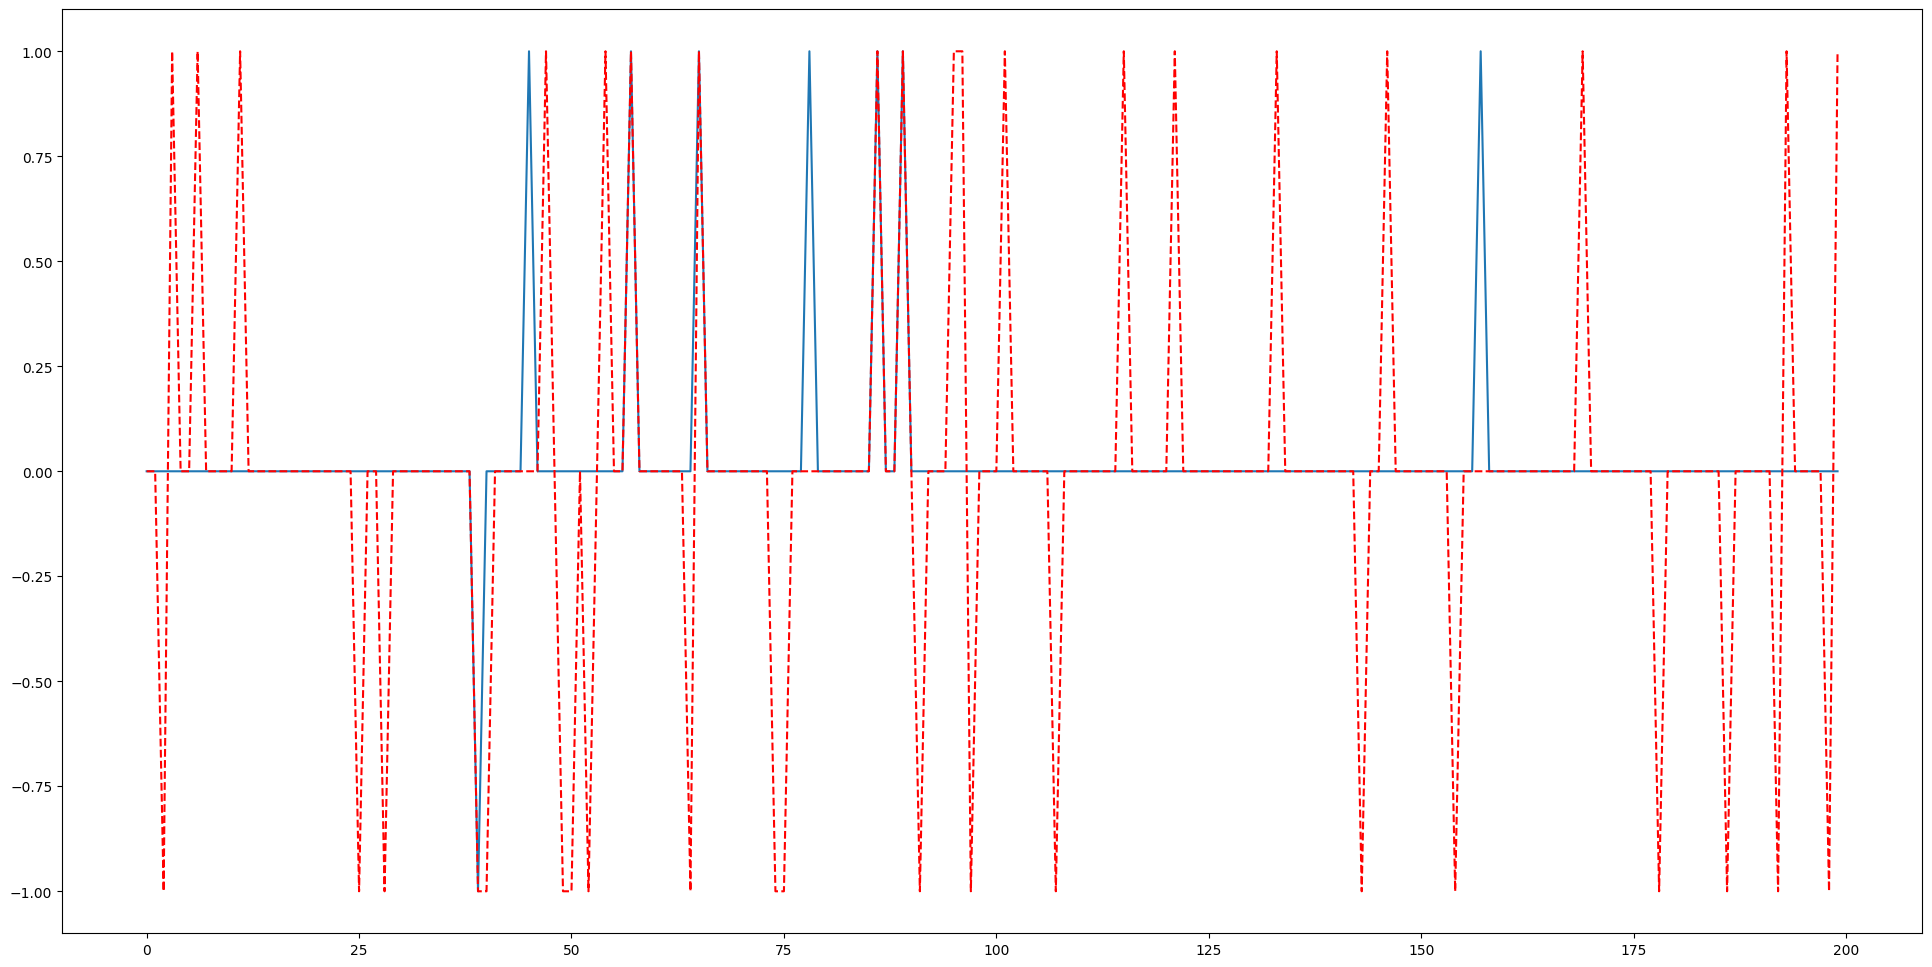

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(24,12))
plt.plot(cmp[-200:])
plt.plot(y_test[-200:],'r', linestyle='--' )
plt.show